# Análise de texto de fontes desestruturadas e Web

## Aula 04

Neste aula iremos aprender como obter e analisar dados da Web (*World Wide Web*) utilizando bibliotecas Python.

<img src="https://atd-insper.s3.us-east-2.amazonaws.com/aula04/img/requests-sidebar.png">

A biblioteca utilizada será a **requests**, cujo lema é *HTTP for humans!* Nosso objetivo será entender como podemos requisitar estes recursos disponíveis na Web.

Para conhecer mais sobre ela, acesse https://requests.readthedocs.io/

## Instalando a biblioteca *requests*

Primeiro, vamos instalar a principal biblioteca da aula!

In [1]:
!pip install requests

Defaulting to user installation because normal site-packages is not writeable


Caso a bibliteca instalada seja de uma versão anterior, podemos atualizar com:

In [2]:
!pip install -U pip
!pip install -U requests

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Importando as bibliotecas necessárias

Agora, vamos importar as bibliotecas necessárias:

In [3]:
# para trabalhar com diretórios / sistema operacional
import os

# para nos comunicarmos com a Web
import requests

# para pegar o executável do Python
import sys

Caso obtenha algum erro, utilize o **!pip install** para instalar a biblioteca ausente!

Vamos conferir com qual versão da biblioteca **requests** estamos trabalhando?

In [4]:
print(requests.__version__)

2.31.0


Você também pode conferir de onde está executando o Python e qual a versão

In [5]:
print("Executável:")
print(sys.executable)

print("\nVersão do Python:")
print(sys.version)

Executável:
/usr/bin/python3

Versão do Python:
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


Vamos conferir em qual diretório iremos trabalhar (é o diretório do notebook)?

In [6]:
print("O seu notebook está na pasta:")
print(os.getcwd())

O seu notebook está na pasta:
/home/gabrielhso/Downloads


## Validação de CEP!

É comum que exista a necessidade de comunicação entre aplicações. Isto é feito pela disponibilização de uma API (*Application Programming Interface - Interface de Programação de Aplicativos*).

Uma API atua como uma camada que provê **comunicação**, ou seja, espeficifa uma interface que outras aplicações devem utilizar caso queiram se comunicar, permitindo que diferentes sistemas conversem entre si sem precisar entender exatamente o que cada um faz.

Apesar do termos ser comumente utilizado em um contexto Web, nos computador as aplicações precisam conhecer a API do sistema operacional para solicitar recursos, e nós programadores precisamos conhecer a API do pandas, sklearn, matplotlib, etc. caso queiramos utilizar recursos destes pacotes no Python!

Como um primeiro exemplo, iremos utilizar a API do viacep para validar **CEP**s!  Abra o site https://viacep.com.br e veja como este webservice (https://pt.wikipedia.org/wiki/Web_service) é disponibilizado.

In [7]:
cep = "04546-042"
url_cep = "https://viacep.com.br/ws/{}/piped/".format(cep)

req = requests.get(url=url_cep)
req

<Response [200]>

Perceba, pela **rota** descrita na **URL**, que escolhemos o formato `piped`. Então, esperamos que as informações do CEP consultado volte como uma string separada por pipes `|`.


Com a requisição feita, vamos conferir o código de resposta:

In [8]:
print(f"Código de status da resposta: {req.status_code}")

Código de status da resposta: 200


O tipo de conteúdo retornado:

In [9]:
req.headers["content-type"]

'text/plain; charset=utf-8'

Perceba que obtivemos `text/plain`, o que significa que a resposta veio como uma string, em codificação `utf-8` (exploraremos depois a codificação).

In [10]:
print("Texto de resposta:\n")
print(req.text)

Texto de resposta:

cep:04546-042|logradouro:Rua Quatá|complemento:de 251/252 a 449/450|bairro:Vila Olímpia|localidade:São Paulo|uf:SP|ibge:3550308|gia:1004|ddd:11|siafi:7107


E se fizermos a requisição de um CEP inválido?!

In [11]:
cep = "12345"
url = f"https://viacep.com.br/ws/{cep}/piped/"

req = requests.get(url=url)
req

<Response [400]>

Conferindo o código de resposta:

In [12]:
print(f"Código de status da resposta: {req.status_code}")

Código de status da resposta: 400


Iremos estudar nos próximos tópicos o significado do status de resposta. Por enquanto, você tem algum palpite sobre em quais situações ele pode ser útil?!

## Códigos de status de respostas HTTP


Quando solicitamos um recurso, quais são as respostas possíveis? É importante perceber que nem sempre o recurso solicitado estará disponível.

Vamos fazer uma requisição GET ao Google.

In [13]:
resposta = requests.get("http://www.google.com/")
resposta

<Response [200]>

Vamos conferir o código de resposta:

In [14]:
print(f"Código de status da resposta: {resposta.status_code}")

Código de status da resposta: 200


In [15]:
resposta.ok

True

Agora, vamos realizar uma consulta utilizando uma URL inexistente:

In [16]:
resposta = requests.get("http://www.google.com/abacadabra")
resposta

<Response [404]>

In [17]:
print(f"Código de status da resposta: {resposta.status_code}")

Código de status da resposta: 404


Perceba que temos um novo código `404` e que a requisição não está ok!

In [18]:
resposta.ok

False

E por último esta consulta retorna:

In [19]:
url = "https://atd-insper.s3.us-east-2.amazonaws.com/aula04/fatura.pdf"

resposta = requests.get(url)
resposta

<Response [403]>

Acesse https://developer.mozilla.org/pt-BR/docs/Web/HTTP/Status ou https://pt.wikipedia.org/wiki/Lista_de_códigos_de_estado_HTTP para ver mais informações sobre os códigos de status da resposta. Eles podem indicar desde um sucesso, recurso inexistente até uma ausência de permissão para acesso.

**Exercício 1** Crie um bloco de código (preferencialmente uma função) que consulte um CEP. Caso o CEP seja válido, imprima o endereço. Caso o CEP seja inválido, imprima a mensagem "*CEP inválido!*"

In [20]:
def consulta_cep(cep):
    # adicione seu código aqui!

SyntaxError: incomplete input (2470712382.py, line 2)

In [21]:
consulta_cep("123")

NameError: name 'consulta_cep' is not defined

In [ ]:
consulta_cep("01310100")

**Exercício 2** O que acontece caso pesquise algum CEP no formato válido, mas que seja um CEP inexistente? Altere sua função para considerar este caso

In [ ]:
def consulta_cep(cep):
    # adicione seu código aqui!

In [ ]:
consulta_cep("77777777")

In [ ]:
consulta_cep("1234")

In [ ]:
consulta_cep("05436100")

**Exercício 3**

- **a)**) Separe a string do endereço do exercício anterior em substrings, divindindo pelo *pipe* (barra vertical $\rightarrow$ |). Armazene o resultado em uma lista.
    
- **b)** Tente também separar o que é título (ex: `logradouro`) do que é conteúdo (ex:`Rua Gonçalo Afonso`). Armazene o resultado em um dicionário.

No exercício 3 o texto de retorno foi dividido utilizando o *pipe* (barra vertical $\rightarrow$ |) como referência. Entretanto, uma forma melhor seria utilizar a interface **JSON** do viacep!

Note que será alterada o final da URL:

In [ ]:
cep = "05436100"
url = f"https://viacep.com.br/ws/{cep}/json/"

req = requests.get(url=url)

endereco = req.text

endereco

In [ ]:
print(endereco)

Vamos utilizar a biblioteca `json` para representar o endereço de forma estruturada:

In [ ]:
import json

dicionario_endereco = json.loads(endereco)
dicionario_endereco

Podemos então utilizar o `dicionario_endereco` para acessar informações dos dados, utilizando **chave** para obter o **valor** armazenado. Veja com a chave **cep**:

In [ ]:
dicionario_endereco["cep"]

**Exercício 4** Qual o código de resposta que identifica que houve **sucesso** na requisição GET?

R:

**Exercício 5** Qual a diferença entre os códigos de erro 401 e 403?

R:

**Exercício 6** Crie um bloco de código que acessa uma URL, informa se houve sucesso ou trata os erros 404, 403 e 401, fornecendo mensagens adequadas.

## Internet Protocol address (IP)

Os seres humanos acessam informações on-line utilizando endereços como http://www.google.com. Para que os recursos sejam localizados, os navegadores da Web utilizam endereços de protocolo de internet (**IP**). A conversão de nomes de domínio em endereços de **IP** pode ser realizada utilizando um serviço **DNS** (*Domain Name System*).

Iremos conferir o endereço **IP** dos servidores que estamos consultando

In [ ]:
gg = requests.get("https://google.com", stream=True)
gg.raw._connection.sock.getpeername()

In [ ]:
gg = requests.get("http://www.ime.usp.br/", stream=True)
gg.raw._connection.sock.getpeername()

No próximo comando, iremos realizar um `ping`. O comando `ping` é uma ferramenta simples usada para testar a conectividade entre dois dispositivos em uma rede. Quando o comando `ping` é executado, ele envia um pacote ICMP (pense como se fosse uma mensagem) para o dispositivo de destino e aguarda uma resposta. Se uma resposta for recebida, o comando ping exibe informações como tempo de resposta, perda de pacotes e número de pacotes transmitidos.

Obs: se estiver no Windows, remova o -c 4

In [ ]:
!ping -c 4 www.insper.edu.br

## Baixando imagens

Nos tópicos anteriores fizemos requisições que retornaram conteúdo do tipo `text/plain` (strings). Entretanto, as mesmas chamadas GET podem ser utilizadas para recuperar imagens, PDFs, páginas Web, etc.

Vamos solicitar uma imagem PNG:

In [ ]:
url_imagem = "https://s2.studylib.net/store/data/013539884_1-c723ea60365e3706a333362a126d4c5a.png"

req = requests.get(url = url_imagem)

print(req.status_code)

Perceba que o código `200` nos indica que obtivemos sucesso!

No `content-type`, perceba que o conteúdo retornado é do tipo `img/png`

In [ ]:
req.headers["content-type"]

Agora, vamos salvar a imagem. Abriremos um arquivo em modo de escrita e escrevemos o conteúdo (`req.content`) retornado pela requisição.

In [ ]:
# Quando utilizamos "with open" não é necessário fazer "arq.close()"
with open("lady.png", "wb") as arq:
    arq.write(req.content)

**Exercício 7** Exiba a imagem na tela.

**Dica:** não se esqueça de importar o **cv2** e o **matplotlib**. Confira como fizemos na aula passada.

**Exercício 8** Conforme aula anterior, utilize um **Reader** do **EasyOCR** para realizar a transcrição dos dados contidos na imagem.

## Baixando arquivos de texto

Vamos baixar um arquivo TXT do livro *Alice's Adventures in Wonderland*. Aproveitando, iremos configurar um **timeout**, que irá definir o tempo máximo de espera por uma resposta.

Para conseguir o link do livro, acesse https://atd-insper.s3.us-east-2.amazonaws.com/aula04/alice_wonderland.txt

In [ ]:
alice_url_txt = "https://atd-insper.s3.us-east-2.amazonaws.com/aula04/alice_wonderland.txt"

resposta = requests.get(url=alice_url_txt, timeout=0.01)

resposta

Perceba que o argumento de `timeout` está quase zero! Provavelmente a requisição irá falhar. Aumente este valor até obter sucesso. Isto será útil quando você tiver uma tolerância máxima de espera por algum recurso.

Vamos conferir o `content-type`:

In [ ]:
resposta.headers["content-type"]

Vejamos o texto retornado:

In [ ]:
print(resposta.text)

Então podemos fazer o que quisermos com este texto:
- Remover stopwords
- Quebrar em palavras
- Analisar sentimento das frases
- etc.

In [ ]:
resposta.text.split()

## Baixando páginas da Web

A parte realmente legal de trabalharmos com dados da Internet é extrair informações das páginas da Web. Será que podemos utilizar a biblioteca **requests** para baixar conteúdos de páginas Web?

Vamos ver um primeiro exemplo:

**Dica**: copie a URL e cole em seu navegador para ver o conteúdo da página renderizado!

In [ ]:
url = "https://atd-insper.s3.us-east-2.amazonaws.com/aula04/amostra.html"

resposta = requests.get(url = url)

resposta

Conferindo o código de resposta:

In [ ]:
print(f"Código de status da resposta: {req.status_code}")

E o texto de resposta:

In [ ]:
print("Texto de resposta:")
print(resposta.text)

Perceberam que alguns caracteres ficaram "estranhos"?!

Vamos conferir o **encoding** utilizado

In [ ]:
resposta.encoding

Vamos alterar o **encoding**

In [ ]:
resposta.encoding = "utf-8"

e rever o texto de resposta

In [ ]:
print("Texto de resposta:")
print(resposta.text)

Este conteúdo é um **HTML** (do inglês *HyperText Markup Language*). Na próxima aula, iremos aprender como extrair informações úteis de páginas HTML.

Vamos conferir outra página mais completa?! Faremos a requisição da página de notícias do IstoÉDinheiro https://istoedinheiro.com.br

In [ ]:
resposta = requests.get(url = "https://istoedinheiro.com.br")

print(resposta.text)

## API para Extração de Textos

Nas últimas aulas discutimos a importância da extração de textos de fontes não estruturadas. Para que este recurso seja implementado, uma opção é a instalação de bibliotecas e criação de soluções personalizadas para a necessidade da empresa. Entretanto, extração de tabelas e OCR pode ser uma necessidade, mas nem sempre a empresa possui recursos (financeiros e de conhecimento) para empenhar na criação de soluções personalizadas.

Diversas soluções, como Google Cloud Vision, AWS Textract, Microsoft Azure Computer Vision foram criadas seguindo o modelo de Software as a Service (SaaS), um modelo de entrega de software em que a aplicação é hospedada em um provedor de serviços em nuvem e disponibilizada aos usuários através da internet. No caso do Amazon Textract, ele é uma solução de OCR baseada em nuvem, onde você pode usar a API para extrair automaticamente texto, escrita à mão, elementos de layout e dados de documentos digitalizados.

Vamos utilizar o Textract para fazer a extração de textos desta imagem:

<img src="https://atd-insper.s3.us-east-2.amazonaws.com/aula04/img/livros_nlp_2.jpg" width="600">

Faça a instalação das bibliotecas necessárias:

In [22]:
!pip install -U pip
!pip install -U boto3

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 6.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.3 MB/s eta 0:00:00


Vamos fazer *download* da imagem que utilizaremos:

In [24]:
!wget https://atd-insper.s3.us-east-2.amazonaws.com/aula04/img/livros_nlp_2.jpg

--2024-02-29 18:52:49--  https://atd-insper.s3.us-east-2.amazonaws.com/aula04/img/livros_nlp_2.jpg
Resolving atd-insper.s3.us-east-2.amazonaws.com (atd-insper.s3.us-east-2.amazonaws.com)... 52.219.100.242, 52.219.108.18, 52.219.141.26, ...
Connecting to atd-insper.s3.us-east-2.amazonaws.com (atd-insper.s3.us-east-2.amazonaws.com)|52.219.100.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242561 (237K) [image/jpeg]
Saving to: ‘livros_nlp_2.jpg’

livros_nlp_2.jpg    100%[===================>] 236,88K   378KB/s    in 0,6s    

2024-02-29 18:52:51 (378 KB/s) - ‘livros_nlp_2.jpg’ saved [242561/242561]



Importe as bibliotecas com:

In [25]:
import boto3
import os
from getpass import getpass

Para que a AWS saiba de quem cobrar pelos serviços, precisamos informar uma chave e um secret de autenticação.

Isto já foi criado pelo professor e está disponível no Blackboard. ATENÇÃO: não compartilhe esta chave com terceiros e em nenhum lugar público, isto pode gerar um prejuizo imenso para o Insper!

Por segurança, estas chaves estarão disponíveis apenas durante a aula. Caso você tente executar o notebook após a aula, provavelmente não irá funcionar.

In [31]:
os.environ["AWS_ACCESS_KEY_ID"] = getpass("Informe o Access Key ID: ")

Informe o Access Key ID: ········


In [32]:
os.environ["AWS_SECRET_ACCESS_KEY"] = getpass("Informe o Secret Access Key: ")

Informe o Secret Access Key: ········


Para extrair textos de uma imagem utilizando o OCR do AWS Textract, podemos utilizar:

In [33]:
# Imagem que queremos analisar
path_imagem = "livros_nlp_2.jpg"

# Configurar um cliente Textract
textract = boto3.client(
    "textract",
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    region_name="us-east-1",
)

# Chamar Amazon Textract
with open(path_imagem, "rb") as doc:
    resposta = textract.analyze_document(
        Document={
            "Bytes": doc.read(),
        },
        FeatureTypes=["LAYOUT"],
    )

Vamos verificar a resposta obtida. Perceba que está em formato JSON:

In [34]:
resposta

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 1.0,
     'Height': 1.0,
     'Left': 0.0,
     'Top': 0.0},
    'Polygon': [{'X': 1.3936322602603468e-06, 'Y': 0.0},
     {'X': 1.0, 'Y': 2.136604507541051e-06},
     {'X': 1.0, 'Y': 1.0},
     {'X': 0.0, 'Y': 1.0}]},
   'Id': 'f4cfe528-f66e-42be-85f8-6a1561e03b38',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['3c1d4526-1598-419f-90b1-0ff8dd4da629',
      '48c2ceb1-e229-4f8c-949e-efb389d06541',
      'd5b727a4-0c5f-4130-8096-787337bac6bf',
      '74411212-c14f-4115-a56e-87309501b8bf',
      'c6a7e117-2201-4105-b3e8-c261ff3a3e8a',
      '572388bd-5082-4b1d-b4be-569e65b0fe94',
      '48c3cf3e-3be5-407e-9ed2-c621e215d6c1',
      'b42bfbdd-9140-4de5-9a4d-6f870196e0cd',
      'ef715aca-233f-4f9a-a9e8-220b93d2a495',
      'f6645e3d-d456-489b-a600-476300812764',
      '6bb45ab4-863b-4afe-b0cb-cc4bc839da49',
      '0b2663a2-c40e-494d-9c56-ba75e324e533',
      'c2fa45e4-aa13-426

Para exibir os bounding boxes das regiões de onde os textos foram extraídos, podemos utilizar:

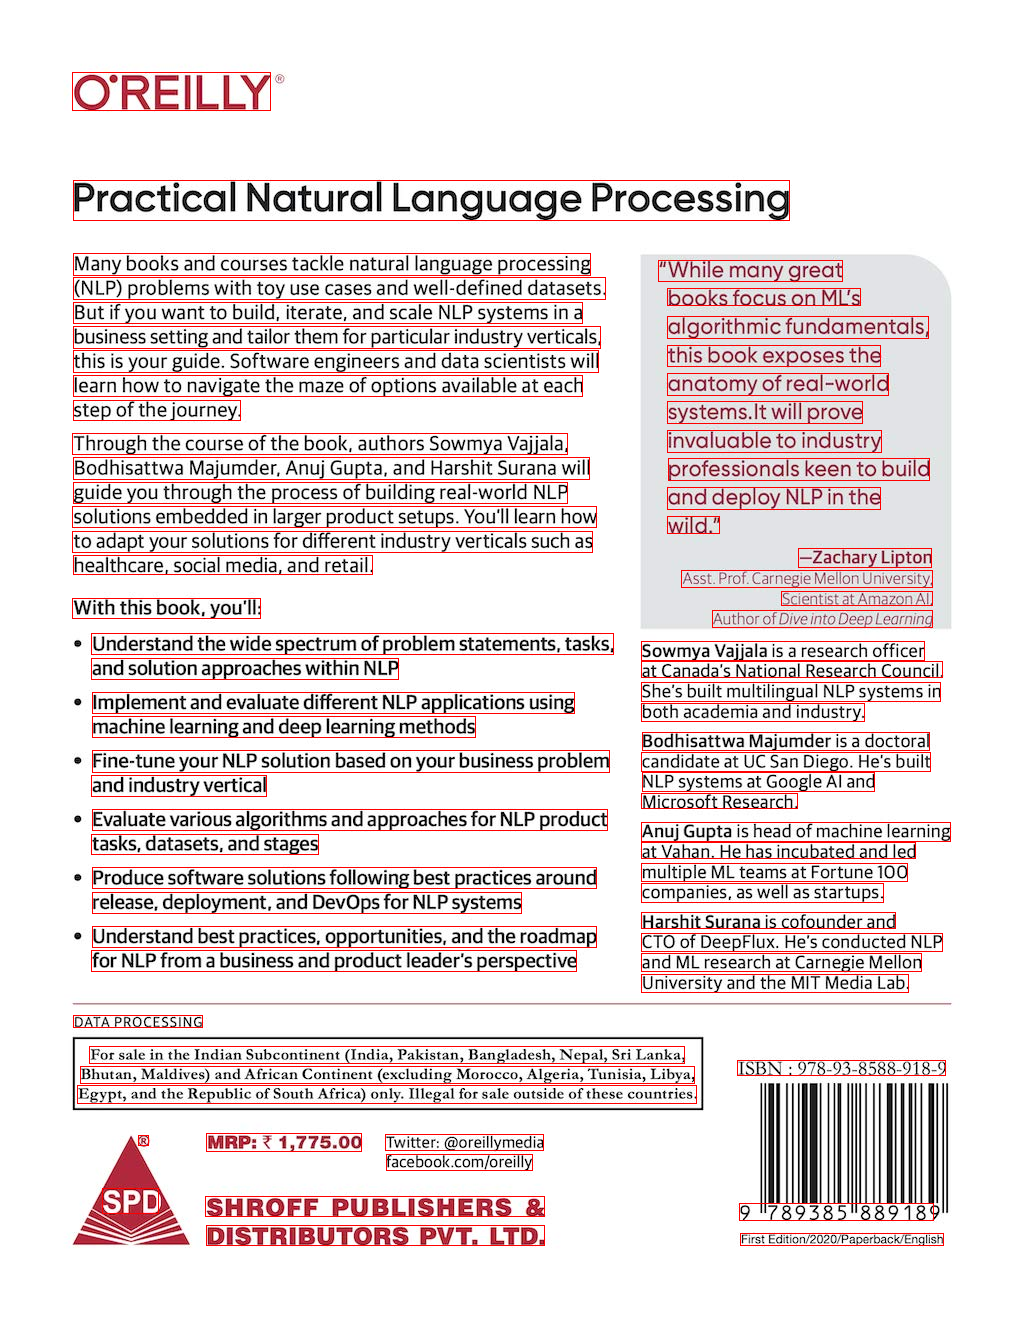

In [35]:
from PIL import Image, ImageDraw
from IPython.display import display

def desenhar_bounding_boxes(path_imagem, resposta):
    image = Image.open(path_imagem)

    draw = ImageDraw.Draw(image)

    for block in resposta['Blocks']:
        if block['BlockType'] == 'LINE':
            # Coordenadas do bounding box
            left = block['Geometry']['BoundingBox']['Left'] * image.width
            top = block['Geometry']['BoundingBox']['Top'] * image.height
            width = block['Geometry']['BoundingBox']['Width'] * image.width
            height = block['Geometry']['BoundingBox']['Height'] * image.height

            # Desenhar retângulo
            draw.rectangle([(left, top), (left + width, top + height)], outline='red')

    display(image)

desenhar_bounding_boxes(path_imagem="livros_nlp_2.jpg", resposta=resposta)

Veja mais em https://docs.aws.amazon.com/textract/latest/dg/what-is.html

**Exercício 9** Vamos analisar a seguinte imagem:

<img src="https://atd-insper.s3.us-east-2.amazonaws.com/aula04/img/livros_aiwplain1.jpg" width="400">

Resolva cada etapa do exercício.

**a)** Faça o download da imagem utilizando `!wget`.

A URL da imagem é https://atd-insper.s3.us-east-2.amazonaws.com/aula04/img/livros_aiwplain1.jpg

In [36]:
!wget "https://atd-insper.s3.us-east-2.amazonaws.com/aula04/img/livros_aiwplain1.jpg"

--2024-02-29 18:57:31--  https://atd-insper.s3.us-east-2.amazonaws.com/aula04/img/livros_aiwplain1.jpg
Resolving atd-insper.s3.us-east-2.amazonaws.com (atd-insper.s3.us-east-2.amazonaws.com)... 52.219.88.200, 52.219.94.250, 52.219.99.58, ...
Connecting to atd-insper.s3.us-east-2.amazonaws.com (atd-insper.s3.us-east-2.amazonaws.com)|52.219.88.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 887282 (866K) [image/jpeg]
Saving to: ‘livros_aiwplain1.jpg’

livros_aiwplain1.jp 100%[===================>] 866,49K   613KB/s    in 1,4s    

2024-02-29 18:57:34 (613 KB/s) - ‘livros_aiwplain1.jpg’ saved [887282/887282]



**b)** Crie uma função que recebe o path de uma imagem e devolve a resposta JSON retornada pelo serviço Amazon Textract (utilizando `textract.analyze_document`).

In [37]:
# Altere esta função para resolver o exercício
def reconhecer_texto(caminho_imagem):

    # Chamar Amazon Textract
    with open(caminho_imagem, "rb") as doc:
        resposta = textract.analyze_document(
            Document={
                "Bytes": doc.read(),
            },
            FeatureTypes=["LAYOUT"],
        )
    return resposta

Vamos conferir o resultado da função:

In [38]:
reconhecer_texto(caminho_imagem="livros_aiwplain1.jpg")

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 1.0,
     'Height': 1.0,
     'Left': 0.0,
     'Top': 0.0},
    'Polygon': [{'X': 0.0, 'Y': 1.7773668332665693e-06},
     {'X': 1.0, 'Y': 0.0},
     {'X': 1.0, 'Y': 1.0},
     {'X': 2.128989535776782e-06, 'Y': 1.0}]},
   'Id': 'ef9b44c7-c9ab-4dec-b670-98407eb0f753',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['4f0ad368-abf9-4b28-b308-8ba1360ea7a9',
      '6120b62d-ddfd-4a57-b29e-da37e9aa6d9f',
      '88e7246b-82a4-4d5f-8208-61b0d0cfeef1',
      '4dd2695d-834d-4287-9122-52477a7cf821',
      'd1bbbc22-c70a-4461-bd15-d4d79265b6e7',
      'a2fddcad-0587-4242-b663-40f33e70c212',
      '5284de1e-232b-4231-88fb-021d775f842b',
      'bdfd9d44-b8d1-4e79-b9f7-3e834967b870',
      '7f4398ee-5871-4ea0-a980-f7a7d8c7a6af',
      '95bf1a87-4528-408f-a693-e75e26bafd52',
      '89430f57-d19c-4cec-a2b6-84375c541e24',
      '4022c5aa-bc7e-41e4-b511-f0069bb91a16',
      '201ef931-90bb-40d

**c)** Crie uma função que recebe um JSON com as informações sobre a extração de textos e devolve uma string contendo todos os testos reconhecidos.

In [ ]:
def concatenar_texto(resposta):
    return ""

Vamos testar:

In [ ]:
# Utiliza ex anterior
resposta = reconhecer_texto(caminho_imagem="livros_aiwplain1.jpg")

print(concatenar_texto(resposta=resposta))

É esperado que a função devolva algo similar a:

```
CHAPTER I. Down the Rabbit-Hole
Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped
into the book her sister was reading, but it had no pictures or
```

## Outras opções
Algumas opções interessantes de **API** para uso em aplicações.
- Twitter API https://developer.twitter.com/en/docs/twitter-api
- Here Geocoding https://developer.here.com/sign-up e https://developer.here.com/c/geocoding
- OpenAI https://openai.com/blog/introducing-chatgpt-and-whisper-apis